In [1]:
## not neccesarily sentence level segmentation
## could be segments within a sentence as well!!



In [1]:
import torch
import math
import numpy as np
def get_length(embedding_1d):
    sum = 0
    for i in embedding_1d:
        sum+=(i**2)
    return math.sqrt(sum)
def normalise_embedding(embedding_1d):
    length = get_length(embedding_1d)
    for i in range(len(embedding_1d)):
        embedding_1d[i] /= length
def get_normalise_embedding(embedding_1d):
    if type(embedding_1d) is torch.Tensor:
        temp_embedding_1d = (embedding_1d.detach().numpy()).copy()
    else:
        temp_embedding_1d = embedding_1d.copy()
    length = get_length(temp_embedding_1d)
    for i in range(len(temp_embedding_1d)):
        temp_embedding_1d[i] /= length
    return temp_embedding_1d


def cosine_sim(embedding_1, embedding_2):
    embedding_1 = get_normalise_embedding(embedding_1)
    embedding_2 = get_normalise_embedding(embedding_2)
    sim_sum = 0
    for e_1, e_2 in zip(embedding_1, embedding_2):
        sim_sum += (e_1*e_2)
    return sim_sum
def norm_ed_cosine_sim(embedding_1, embedding_2):
    sim_sum = 0
    for e_1, e_2 in zip(embedding_1, embedding_2):
        sim_sum += (e_1*e_2)
    return sim_sum

In [ ]:




## can be an attempt of the tokenizer version here if need be
'''
# Load model directly
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("sentence-transformers/all-MiniLM-L6-v2")
model = AutoModel.from_pretrained("sentence-transformers/all-MiniLM-L6-v2")
'''

In [2]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

#sentences = ["This is an example sentence", "Each sentence is converted"]
#embeddings = model.encode(sentences)
def get_sentence_embedding(sentence):
    return model.encode(sentence)

c:\Users\Audric Ho\Downloads\LLM related stuff\semantic_text_segmentation_attempt\semantic_seg-venv\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange
c:\Users\Audric Ho\Downloads\LLM related stuff\semantic_text_segmentation_attempt\semantic_seg-venv\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [3]:
sents = "employees will be given a direct free flight to their home country and all staff will also be allowed to enjoy a full expenses paid trip, courtesy of the company!"



## tokenizer not used for this library yet for now, so the below is done
sents = sents.split(" ")
print(sents)




['employees', 'will', 'be', 'given', 'a', 'direct', 'free', 'flight', 'to', 'their', 'home', 'country', 'and', 'all', 'staff', 'will', 'also', 'be', 'allowed', 'to', 'enjoy', 'a', 'full', 'expenses', 'paid', 'trip,', 'courtesy', 'of', 'the', 'company!']


In [4]:
from itertools import islice

def window(seq, n=3):
    it = iter(seq)
    result = tuple(islice(it, n))
    if len(result) == n:
        yield result
    for elem in it:
        result = result[1:] + (elem,)
        yield result

In [5]:
WINDOW_SIZE = 3
window_size_split = list(window(sents, WINDOW_SIZE))
print(window_size_split)
window_splited_texts = [' '.join([window_toks for window_toks in each_window]) for each_window in window_size_split]
print(window_splited_texts)

[('employees', 'will', 'be'), ('will', 'be', 'given'), ('be', 'given', 'a'), ('given', 'a', 'direct'), ('a', 'direct', 'free'), ('direct', 'free', 'flight'), ('free', 'flight', 'to'), ('flight', 'to', 'their'), ('to', 'their', 'home'), ('their', 'home', 'country'), ('home', 'country', 'and'), ('country', 'and', 'all'), ('and', 'all', 'staff'), ('all', 'staff', 'will'), ('staff', 'will', 'also'), ('will', 'also', 'be'), ('also', 'be', 'allowed'), ('be', 'allowed', 'to'), ('allowed', 'to', 'enjoy'), ('to', 'enjoy', 'a'), ('enjoy', 'a', 'full'), ('a', 'full', 'expenses'), ('full', 'expenses', 'paid'), ('expenses', 'paid', 'trip,'), ('paid', 'trip,', 'courtesy'), ('trip,', 'courtesy', 'of'), ('courtesy', 'of', 'the'), ('of', 'the', 'company!')]
['employees will be', 'will be given', 'be given a', 'given a direct', 'a direct free', 'direct free flight', 'free flight to', 'flight to their', 'to their home', 'their home country', 'home country and', 'country and all', 'and all staff', 'all st

In [6]:
len(window_splited_texts)

28

In [7]:
window_splited_text_embs = get_sentence_embedding(window_splited_texts)
window_splited_text_embs

array([[-0.03081522,  0.0031425 ,  0.05901531, ..., -0.06705266,
         0.10850658,  0.02596981],
       [-0.1051256 ,  0.12200781, -0.03538968, ..., -0.02627648,
         0.00167463, -0.02072385],
       [-0.05360793,  0.11607982, -0.02070771, ...,  0.0116876 ,
        -0.00354197,  0.02919053],
       ...,
       [ 0.01149159,  0.04438375,  0.04850981, ..., -0.03584366,
         0.00670551, -0.02254926],
       [-0.05210889,  0.07077521,  0.0051759 , ..., -0.00697919,
         0.06259091,  0.03310641],
       [-0.08380346,  0.00178884,  0.00417018, ..., -0.06684458,
         0.06441841,  0.05952274]], dtype=float32)

In [8]:
len(window_splited_text_embs)

28

In [9]:
## embs <=> encoding/encoded

In [10]:
for i in window_splited_text_embs:
    print(get_length(i))

1.0000000374917177
1.000000069968425
1.0000000080377724
1.0000000203554684
0.9999999839503355
1.0000000118550425
1.0000000209210027
0.9999999483593873
1.0000000438250607
0.9999999665791369
1.0000000080114946
0.9999999535405636
0.9999999906230143
0.9999999971368632
1.0000000259061432
0.9999999933979365
0.9999999776835017
1.0000000251656422
1.0000000089880883
1.000000015036995
1.0000000493918233
1.000000021103647
1.0000000048720037
1.0000000056887028
1.0000000252414756
1.0000000577646189
0.9999999700676306
1.0000000475904374


In [11]:
coherence_scores = [norm_ed_cosine_sim(pair[0], pair[1]) for pair in zip(window_splited_text_embs, window_splited_text_embs[1:])]
coherence_scores

[0.42944603222349564,
 0.6587524334795493,
 0.39418828864222655,
 0.6643291976481012,
 0.6802709013994105,
 0.8804973317366491,
 0.6185444029007388,
 0.6435250127919121,
 0.626541585529026,
 0.7638165858743664,
 0.7315014266480377,
 0.30282096249766277,
 0.6931602253856115,
 0.8558303580974782,
 0.572413117424958,
 0.468426447448792,
 0.7599066288794349,
 0.6719635462612816,
 0.6231709915241483,
 0.4344735540216791,
 0.392371340298496,
 0.858538788398221,
 0.6986485769803112,
 0.7796253853704231,
 0.8141148862392245,
 0.665404934601327,
 0.34863432926442817]

In [11]:
!pip install matplotlib

     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     --------- ----------------------------- 41.0/165.5 kB 1.9 MB/s eta 0:00:01
     -------------------------------------- 165.5/165.5 kB 4.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.0 MB 32.0 MB/s eta 0:00:01
   ---------- ----------------------------- 2.2/8.0 MB 27.8 MB/s eta 0:00:01
   ----------------- ---------------------- 3.6/8.0 MB 28.3 MB/s eta 0:00:01
   ------------------------ --------------- 4.9/8.0 MB 28.4 MB/s eta 0:00:01
   ------------------------------- -------- 6.2/8.0 MB 28.2 MB/s eta 0:00:01
   ---------------------------------- ----- 6.9/8.0 MB 27.7 MB/s eta 0:00:01
   ---------------------------------- ----- 6.9/8.0 MB 27.7 MB/s eta 0:00:01
   -------------------------------------- - 7.7/8.0 MB 21.4 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 20.4 MB/s eta 0:00:00
   --


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import matplotlib.pyplot as plt

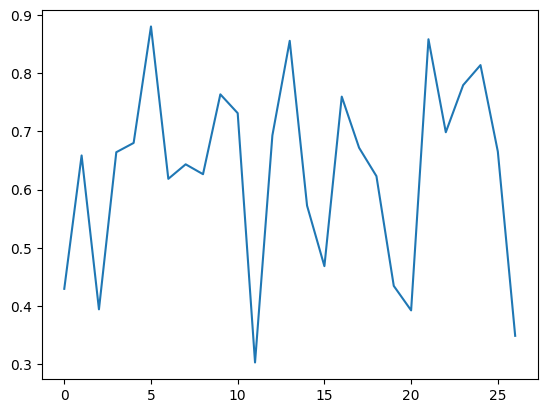

In [13]:
#plt.plot(range(len(coherence_scores)), coherence_scores)
plt.plot(coherence_scores)

In [15]:
coherence_scores[10:15]

[0.7315014266480377,
 0.30282096249766277,
 0.6931602253856115,
 0.8558303580974782,
 0.572413117424958]

In [16]:
window_splited_texts[11]

'country and all'

In [22]:
split_indexes = [coherence_scores.index(min(coherence_scores))]
## maybe only if coherence level drop below a certain amount?
## or just always split and try to match split, since if both a1 and a2 part of a, both should match to same category?

In [33]:
## index of split => index1, index2, index3, if lowest means 1 and 3 diff topic? so split up and 2 can just follow either or be left out?
intervals_indexes = [0] + [ind+(WINDOW_SIZE-1) for ind in split_indexes] + [len(sents)]
intervals_indexes

[0, 13, 30]

In [31]:
segment_indexes = list(zip(intervals_indexes[:-1], intervals_indexes[1:]))
segment_indexes

[(0, 13), (13, 30)]

In [32]:
sent_segments = [" ".join(sents[seg_ind[0]:seg_ind[1]]) for seg_ind in segment_indexes]
sent_segments

['employees will be given a direct free flight to their home country and',
 'all staff will also be allowed to enjoy a full expenses paid trip, courtesy of the company!']

In [34]:
## polishing the depth scores


In [36]:
def climb_v1(co_score_list, list_index, mode = "l"):
    res_score = 0
    if mode == "l":
        while (list_index >= 0):
            if co_score_list[list_index] > res_score:
                res_score = co_score_list[list_index]
                list_index -= 1
            else:
                break
        return res_score
    else:
        list_len = len(co_score_list)
        while (list_index < list_len):
            if co_score_list[list_index] > res_score:
                res_score = co_score_list[list_index]
                list_index += 1
            else:
                break
        return res_score

In [37]:
def depth_score_v1(co_score_list):
    res_depth_score_list = []
    co_score_len = len(co_score_list)
    for i in range(co_score_len):
        i_co_score = co_score_list[i]
        l_peak = climb_v1(co_score_list, i, "l")
        r_peak = climb_v1(co_score_list, i, "r")
        i_depth_score = 0.5 * (l_peak + r_peak - (2*i_co_score))
        res_depth_score_list.append(i_depth_score)
    return res_depth_score_list

In [39]:
depth_score_v1_list = depth_score_v1(coherence_scores)
depth_score_v1_list

[0.11465320062802675,
 0.0,
 0.3754365939658726,
 0.10808406704427398,
 0.10011321516861937,
 0.0,
 0.14346676936354186,
 0.0,
 0.0771292138041133,
 0.0,
 0.01615757961316433,
 0.5070025094882595,
 0.08133506635593335,
 0.0,
 0.14170862033626008,
 0.33944204603966455,
 0.0,
 0.043971541309076656,
 0.0683678186776433,
 0.16271653742887793,
 0.41685136834033193,
 0.0,
 0.13767826033841146,
 0.017244750434400657,
 0.0,
 0.07435497581894868,
 0.2327402784873981]

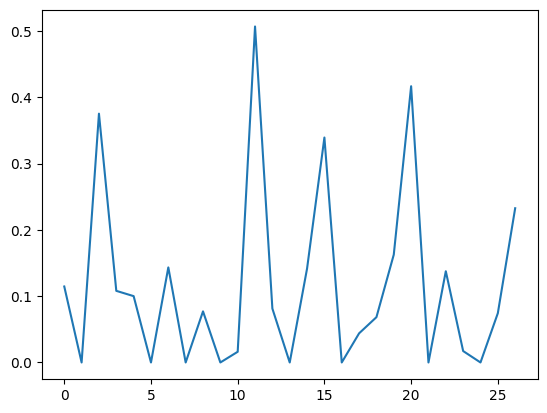

In [40]:
plt.plot(depth_score_v1_list)

In [41]:
from scipy.signal import argrelmax

def get_local_maxima(depth_scores, order=1):
     maxima_ids = argrelmax(depth_scores, order=order)[0]
     filtered_scores = np.zeros(len(depth_scores))
     filtered_scores[maxima_ids] = depth_scores[maxima_ids]
     return filtered_scores

In [57]:
filtered_scores_list = get_local_maxima(np.array(depth_score_v1_list), order=1)
filtered_scores_list

array([0.        , 0.        , 0.37543659, 0.        , 0.        ,
       0.        , 0.14346677, 0.        , 0.07712921, 0.        ,
       0.        , 0.50700251, 0.        , 0.        , 0.        ,
       0.33944205, 0.        , 0.        , 0.        , 0.        ,
       0.41685137, 0.        , 0.13767826, 0.        , 0.        ,
       0.        , 0.        ])

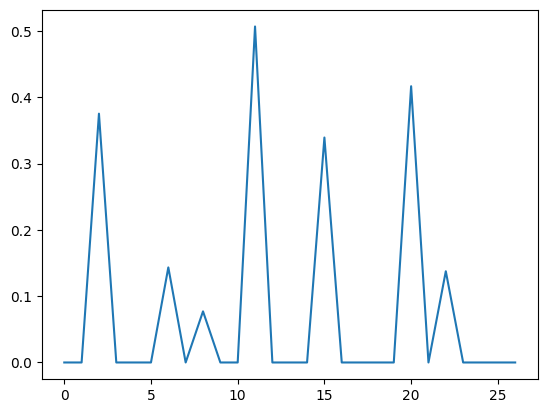

In [44]:
plt.plot(filtered_scores_list)

In [45]:
def compute_threshold(scores):
     s = scores[np.nonzero(scores)]
     threshold = np.mean(s) - (np.std(s) / 2)
     # threshold = np.mean(s) - (np.std(s))
     return threshold

In [63]:
filtered_list_threshold = compute_threshold(filtered_scores_list)
filtered_list_threshold

0.20904513493098742

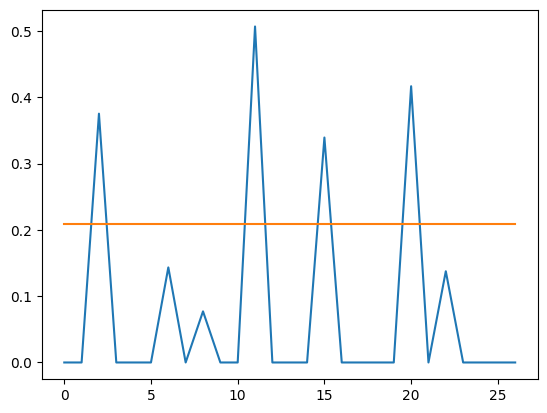

In [64]:
fsl_len = len(filtered_scores_list)
plt.plot(filtered_scores_list)
plt.plot([filtered_list_threshold for i in range(fsl_len)])
plt.show()

In [60]:
compute_threshold(np.array(depth_score_v1_list)), compute_threshold(np.array(filtered_scores_list))

(0.09718835316571808, 0.20904513493098742)

In [59]:
np.std(np.array(depth_score_v1_list)), np.std(np.array(filtered_scores_list))

(0.13849563637183931, 0.14716733261584744)

In [58]:
np.mean(np.array(depth_score_v1_list)), np.mean(np.array(filtered_scores_list))

(0.11697979306084513, 0.0739632133829702)

In [61]:
np.nonzero(np.array(depth_score_v1_list)), np.nonzero(np.array(filtered_scores_list))

((array([ 0,  2,  3,  4,  6,  8, 10, 11, 12, 14, 15, 17, 18, 19, 20, 22, 23,
         25, 26], dtype=int64),),
 (array([ 2,  6,  8, 11, 15, 20, 22], dtype=int64),))

In [62]:
np.array(depth_score_v1_list)[np.nonzero(np.array(depth_score_v1_list))], np.array(filtered_scores_list)[np.nonzero(np.array(filtered_scores_list))]

(array([0.1146532 , 0.37543659, 0.10808407, 0.10011322, 0.14346677,
        0.07712921, 0.01615758, 0.50700251, 0.08133507, 0.14170862,
        0.33944205, 0.04397154, 0.06836782, 0.16271654, 0.41685137,
        0.13767826, 0.01724475, 0.07435498, 0.23274028]),
 array([0.37543659, 0.14346677, 0.07712921, 0.50700251, 0.33944205,
        0.41685137, 0.13767826]))

In [65]:
def get_threshold_segments(scores, threshold=0.1):
     segment_ids = np.where(scores >= threshold)[0]
     return segment_ids
segment_ids = get_threshold_segments(filtered_scores_list, filtered_list_threshold)
segment_ids

array([ 2, 11, 15, 20], dtype=int64)

In [68]:
new_segment_ids = [0] + [(ids+(WINDOW_SIZE-1)) for ids in segment_ids] + [len(sents)]
new_segment_ids_intervals = list(zip(new_segment_ids[:-1], new_segment_ids[1:]))
new_sent_id_segments = [" ".join(sents[seg_ind[0]:seg_ind[1]]) for seg_ind in new_segment_ids_intervals]
new_sent_id_segments

['employees will be given',
 'a direct free flight to their home country and',
 'all staff will also',
 'be allowed to enjoy a',
 'full expenses paid trip, courtesy of the company!']

In [69]:
def generic_sent_cos_sim(model_emb_func, t1, t2, additional_nesting = False):
    if additional_nesting:
        return cosine_sim(model_emb_func(t1)[0], model_emb_func(t2)[0])    
    return cosine_sim(model_emb_func(t1), model_emb_func(t2))

def test_emb_model(model_emb_func, sent_pair_comparison_list, sorting = False, additional_nesting = False):
    ending_dict = {}
    for comp1, comp2 in sent_pair_comparison_list:
        ending_dict[(comp1, comp2)] = generic_sent_cos_sim(model_emb_func, comp1, comp2, additional_nesting)
    if sorting:
        sorted_ending_dict = {comps:comps_res for comps, comps_res in (sorted(ending_dict.items(), key=lambda dict_item: dict_item[1], reverse = True))}
        return sorted_ending_dict
    return ending_dict
def test_emb_model_results(ending_dict, sorting = False):
    print("Similarity level:")
    #res_sum = 0
    if sorting:
        for comps, res in (sorted(ending_dict.items(), key= lambda dict_item: dict_item[1], reverse=True)):
            ## print(f"{comps[0]:20.5}-{comps[1]:5.20}: {res:.5}") # "{:min_pad.max_pad}", max pad is essentially also the max number of chars permitted!!
            print(f"{comps[0]:20.20} /-/ {comps[1]:20.20} : {res:.5}")
            #res_sum += res
    else:
        for comps, res in ending_dict.items():
            ## print(f"{comps[0]:20.5}-{comps[1]:5.20}: {res:.5}") # "{:min_pad.max_pad}", max pad is essentially also the max number of chars permitted!!
            print(f"{comps[0]:20.20} /-/ {comps[1]:20.20} : {res:.5}")
            #res_sum += res
        
    ## res_sum no purpose and stuff yet since no measure of accuracy present, like it should/should not match, dont know so cannot say the sum is good or not, etc or avg, but later on can try with these and maybe weighted based on certain comparisons more impt?

In [70]:
comparison_list = [(c1, c2) for c1,c2 in zip(new_sent_id_segments, ["home passage" for i in range(len(new_sent_id_segments))])]


In [72]:
res_dict = test_emb_model(get_sentence_embedding, comparison_list, sorting=False , additional_nesting=False)
test_emb_model_results(res_dict, sorting=True)

Similarity level:
a direct free flight /-/ home passage         : 0.27428
full expenses paid t /-/ home passage         : 0.1874
be allowed to enjoy  /-/ home passage         : 0.1771
employees will be gi /-/ home passage         : 0.093017
all staff will also  /-/ home passage         : 0.080272


In [73]:
def test_to_see(new_sent_id_segments_input, category_text):
    comparison_list = [(c1, c2) for c1,c2 in zip(new_sent_id_segments_input, [category_text for i in range(len(new_sent_id_segments_input))])]
    res_dict = test_emb_model(get_sentence_embedding, comparison_list, sorting=False , additional_nesting=False)
    test_emb_model_results(res_dict, sorting=True)

In [74]:
test_to_see(new_sent_id_segments, "free vacation")

Similarity level:
a direct free flight /-/ free vacation        : 0.50248
full expenses paid t /-/ free vacation        : 0.49319
be allowed to enjoy  /-/ free vacation        : 0.2552
employees will be gi /-/ free vacation        : 0.18043
all staff will also  /-/ free vacation        : 0.14699


In [75]:
test_to_see(new_sent_id_segments, "subsidised overseas trip")

Similarity level:
a direct free flight /-/ subsidised overseas  : 0.52189
full expenses paid t /-/ subsidised overseas  : 0.44013
be allowed to enjoy  /-/ subsidised overseas  : 0.11998
employees will be gi /-/ subsidised overseas  : 0.10505
all staff will also  /-/ subsidised overseas  : 0.049202


In [1]:
import torch
import math
import numpy as np
def get_length(embedding_1d):
    sum = 0
    for i in embedding_1d:
        sum+=(i**2)
    return math.sqrt(sum)
def normalise_embedding(embedding_1d):
    length = get_length(embedding_1d)
    for i in range(len(embedding_1d)):
        embedding_1d[i] /= length
def get_normalise_embedding(embedding_1d):
    if type(embedding_1d) is torch.Tensor:
        temp_embedding_1d = (embedding_1d.detach().numpy()).copy()
    else:
        temp_embedding_1d = embedding_1d.copy()
    length = get_length(temp_embedding_1d)
    for i in range(len(temp_embedding_1d)):
        temp_embedding_1d[i] /= length
    return temp_embedding_1d


def cosine_sim(embedding_1, embedding_2):
    embedding_1 = get_normalise_embedding(embedding_1)
    embedding_2 = get_normalise_embedding(embedding_2)
    sim_sum = 0
    for e_1, e_2 in zip(embedding_1, embedding_2):
        sim_sum += (e_1*e_2)
    return sim_sum
def norm_ed_cosine_sim(embedding_1, embedding_2):
    sim_sum = 0
    for e_1, e_2 in zip(embedding_1, embedding_2):
        sim_sum += (e_1*e_2)
    return sim_sum

In [2]:
def generic_sent_cos_sim(model_emb_func, t1, t2, additional_nesting = False):
    if additional_nesting:
        return cosine_sim(model_emb_func(t1)[0], model_emb_func(t2)[0])    
    return cosine_sim(model_emb_func(t1), model_emb_func(t2))

def test_emb_model(model_emb_func, sent_pair_comparison_list, sorting = False, additional_nesting = False):
    ending_dict = {}
    for comp1, comp2 in sent_pair_comparison_list:
        ending_dict[(comp1, comp2)] = generic_sent_cos_sim(model_emb_func, comp1, comp2, additional_nesting)
    if sorting:
        sorted_ending_dict = {comps:comps_res for comps, comps_res in (sorted(ending_dict.items(), key=lambda dict_item: dict_item[1], reverse = True))}
        return sorted_ending_dict
    return ending_dict
def test_emb_model_results(ending_dict, sorting = False):
    print("Similarity level:")
    #res_sum = 0
    if sorting:
        for comps, res in (sorted(ending_dict.items(), key= lambda dict_item: dict_item[1], reverse=True)):
            ## print(f"{comps[0]:20.5}-{comps[1]:5.20}: {res:.5}") # "{:min_pad.max_pad}", max pad is essentially also the max number of chars permitted!!
            print(f"{comps[0]:20.20} /-/ {comps[1]:20.20} : {res:.5}")
            #res_sum += res
    else:
        for comps, res in ending_dict.items():
            ## print(f"{comps[0]:20.5}-{comps[1]:5.20}: {res:.5}") # "{:min_pad.max_pad}", max pad is essentially also the max number of chars permitted!!
            print(f"{comps[0]:20.20} /-/ {comps[1]:20.20} : {res:.5}")
            #res_sum += res
        
    ## res_sum no purpose and stuff yet since no measure of accuracy present, like it should/should not match, dont know so cannot say the sum is good or not, etc or avg, but later on can try with these and maybe weighted based on certain comparisons more impt?

In [3]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

#sentences = ["This is an example sentence", "Each sentence is converted"]
#embeddings = model.encode(sentences)
def get_sentence_embedding(sentence):
    return model.encode(sentence)

c:\Users\Audric Ho\Downloads\LLM related stuff\semantic_text_segmentation_attempt\semantic_seg-venv\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange
c:\Users\Audric Ho\Downloads\LLM related stuff\semantic_text_segmentation_attempt\semantic_seg-venv\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [4]:
from itertools import islice

def window(seq, n=3):
    it = iter(seq)
    result = tuple(islice(it, n))
    if len(result) == n:
        yield result
    for elem in it:
        result = result[1:] + (elem,)
        yield result

In [15]:
def climb_v1(co_score_list, list_index, mode = "l"):
    res_score = 0
    if mode == "l":
        while (list_index >= 0):
            if co_score_list[list_index] > res_score:
                res_score = co_score_list[list_index]
                list_index -= 1
            else:
                break
        return res_score
    else:
        list_len = len(co_score_list)
        while (list_index < list_len):
            if co_score_list[list_index] > res_score:
                res_score = co_score_list[list_index]
                list_index += 1
            else:
                break
        return res_score
    
    
def depth_score_v1(co_score_list):
    res_depth_score_list = []
    co_score_len = len(co_score_list)
    for i in range(co_score_len):
        i_co_score = co_score_list[i]
        l_peak = climb_v1(co_score_list, i, "l")
        r_peak = climb_v1(co_score_list, i, "r")
        i_depth_score = 0.5 * (l_peak + r_peak - (2*i_co_score))
        res_depth_score_list.append(i_depth_score)
    return np.array(res_depth_score_list)

In [84]:
import matplotlib.pyplot as plt

from scipy.signal import argrelmax

def get_local_maxima(depth_scores, order=1):
    maxima_ids = argrelmax(depth_scores, order=order)[0]
    filtered_scores = np.zeros(len(depth_scores))
    filtered_scores[maxima_ids] = depth_scores[maxima_ids]
    return filtered_scores

def compute_threshold(scores):
    s = scores[np.nonzero(scores)]
    threshold = np.mean(s) - (np.std(s) / 2)
    # threshold = np.mean(s) - (np.std(s))
    return threshold

def get_threshold_segments(scores, threshold=0.1):
    segment_ids = np.where(scores >= threshold)[0]
    return segment_ids
 
def test_to_see(new_sent_id_segments_input, category_text, sort_results = True, nested_emb = False):
    comparison_list = [(c1, c2) for c1,c2 in zip(new_sent_id_segments_input, [category_text for i in range(len(new_sent_id_segments_input))])]
    res_dict = test_emb_model(get_sentence_embedding, comparison_list, sorting=False , additional_nesting=nested_emb)
    test_emb_model_results(res_dict, sorting=sort_results)
 

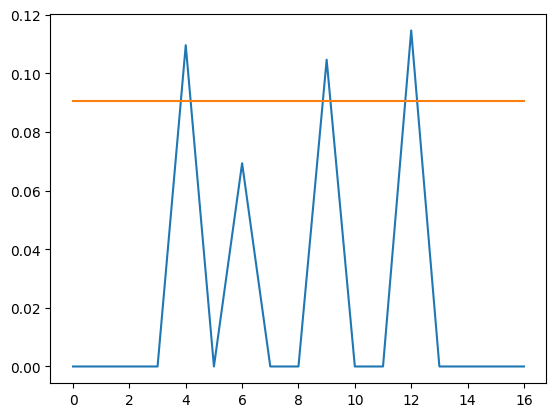

['Employees receive free flight benefits to',
 'return to home country once',
 'a year and',
 'free flight benefits for business trips']

In [85]:
WINDOW_SIZE = 3

def primitively_naive_tokeniser(text):
    toks_list = text.split(" ")
    return toks_list

def split_sentence_s_to_parts(sentence_s):
    sents_words_toks = primitively_naive_tokeniser(sentence_s)
    window_size_split = list(window(sents_words_toks, WINDOW_SIZE))
    window_splited_texts = [' '.join([window_toks for window_toks in each_window]) for each_window in window_size_split]
    return window_splited_texts

def emb_and_get_coherence(window_splited_texts):
    window_splited_text_embs = get_sentence_embedding(window_splited_texts)
    coherence_scores = [norm_ed_cosine_sim(pair[0], pair[1]) for pair in zip(window_splited_text_embs, window_splited_text_embs[1:])]
    return coherence_scores



def plot_coherence(vary_data, thres = -1):
    plt.plot(vary_data)
    if (thres == -1):
        plt.show()
    else:
        plt.plot([thres for i in range(len(vary_data))])
        plt.show()


def filtered_indexes_list_to_splitted_sent(original_sent, filtered_indexes_list):
    sents_words_toks = primitively_naive_tokeniser(original_sent)
    segment_key_breaks = get_threshold_segments(filtered_indexes_list, compute_threshold(filtered_indexes_list))
    segment_demark = [0] + [(ids + (WINDOW_SIZE-1)) for ids in segment_key_breaks] + [len(sents_words_toks)]
    segment_demark_intervals = list(zip(segment_demark[:-1], segment_demark[1:]))
    #print(segment_demark_intervals)
    resultant_segments_after_split_by_interval = [" ".join(sents_words_toks[interval_points[0]:interval_points[1]]) for interval_points in segment_demark_intervals]
    return resultant_segments_after_split_by_interval


temp_sent = "Employees receive free flight benefits to return to home country once a year and free flight benefits for business trips"

a = split_sentence_s_to_parts(temp_sent)
b = emb_and_get_coherence(a)
c = depth_score_v1(b)
d = get_local_maxima(c)
d_th = compute_threshold(d)
plot_coherence(d, d_th)


filtered_indexes_list_to_splitted_sent(temp_sent, d)
    

In [64]:
def split_by_points(sentences, graph=False):
    windowed_sentences = split_sentence_s_to_parts(sentences)
    print(f"windowed_sentences: {windowed_sentences}")
    
    windowed_sentences_coherence_score_list = emb_and_get_coherence(windowed_sentences)
    print(f"windowed_sentences_coherence_score_list: {windowed_sentences_coherence_score_list}")
    if graph:
        plot_coherence(windowed_sentences_coherence_score_list)
    
    windowed_sentences_depth_score_v1_list = depth_score_v1(windowed_sentences_coherence_score_list)
    print(f"windowed_sentences_depth_score_v1_list: {windowed_sentences_depth_score_v1_list}")
    if graph:
        plot_coherence(windowed_sentences_depth_score_v1_list)
    
    windowed_sentences_filtered_depth_score_v1_list = get_local_maxima(windowed_sentences_depth_score_v1_list)
    print(f"windowed_sentences_filtered_depth_score_v1_list: {windowed_sentences_filtered_depth_score_v1_list}")
    if graph:
        plot_coherence(windowed_sentences_filtered_depth_score_v1_list)
    
    filtered_threshold = compute_threshold(windowed_sentences_filtered_depth_score_v1_list)
    if graph:
        plot_coherence(windowed_sentences_filtered_depth_score_v1_list, filtered_threshold)

    #sentences_tokenised = primitively_naive_tokeniser(sentences)
    #sentences_topics_splitted = filtered_indexes_list_to_splitted_sent(sentences_tokenised, windowed_sentences_filtered_depth_score_v1_list)
    sentences_topics_splitted = filtered_indexes_list_to_splitted_sent(sentences, windowed_sentences_filtered_depth_score_v1_list)
    return sentences_topics_splitted
    

In [65]:
split_by_points("Employee benefits include air tickets during festive season, and hampers during festive season")

windowed_sentences: ['Employee benefits include', 'benefits include air', 'include air tickets', 'air tickets during', 'tickets during festive', 'during festive season,', 'festive season, and', 'season, and hampers', 'and hampers during', 'hampers during festive', 'during festive season']
windowed_sentences_coherence_score_list: [0.5466175834787921, 0.49320915320220154, 0.82245336052614, 0.5764373010858322, 0.6335995284515052, 0.8407950611328945, 0.5712237785708114, 0.7088468169607653, 0.7068324065675571, 0.5553888196847583]
windowed_sentences_depth_score_v1_list: [0.         0.19132632 0.         0.25518691 0.10359777 0.
 0.20359716 0.         0.00100721 0.076729  ]
windowed_sentences_filtered_depth_score_v1_list: [0.         0.19132632 0.         0.25518691 0.         0.
 0.20359716 0.         0.         0.        ]


['Employee benefits include air tickets',
 'during festive season,',
 'and hampers during festive season']

In [66]:
split_by_points("We provide employees with gifts including red packets for chinese new year, hari raya, deepavali and birthday ")

windowed_sentences: ['We provide employees', 'provide employees with', 'employees with gifts', 'with gifts including', 'gifts including red', 'including red packets', 'red packets for', 'packets for chinese', 'for chinese new', 'chinese new year,', 'new year, hari', 'year, hari raya,', 'hari raya, deepavali', 'raya, deepavali and', 'deepavali and birthday', 'and birthday ']
windowed_sentences_coherence_score_list: [0.823550024440465, 0.6004445330759156, 0.5205524019140741, 0.6226680143622618, 0.4554223139242454, 0.8258749951012733, 0.5261055060722912, 0.5675626581873987, 0.6357106203267906, 0.5779699630124926, 0.731361325923743, 0.7543062057141017, 0.7556717498818559, 0.6208882232550226, 0.49048782623975756]
windowed_sentences_depth_score_v1_list: [0.         0.11155275 0.20255662 0.         0.26884919 0.
 0.2046873  0.03407398 0.         0.11772122 0.01215521 0.00068277
 0.         0.06739176 0.13259196]
windowed_sentences_filtered_depth_score_v1_list: [0.         0.         0.2025566

['We provide employees with',
 'gifts including',
 'red packets',
 'for chinese new year, hari raya, deepavali and birthday ']

In [87]:
def combined_split_test(sentences, categories, graph_status, sort_results = True, nested_emb = False):
    splitted_sentences = split_by_points(sentences, graph=graph_status)
    
    print()
    print(splitted_sentences)
    print()
    
    if type(categories) != list:
        categories = [categories]
    for category in categories:
        print(f"Category: {category}")
        test_to_see(splitted_sentences, category, sort_results = sort_results, nested_emb=nested_emb)
        print()

In [70]:
sentences_demo = "Employee benefits include air tickets during festive season, and hampers during festive season"
categories_demo = ["Overseas holiday trips", "Festive occasion gift"]
combined_split_test(sentences_demo, categories_demo, False)

windowed_sentences: ['Employee benefits include', 'benefits include air', 'include air tickets', 'air tickets during', 'tickets during festive', 'during festive season,', 'festive season, and', 'season, and hampers', 'and hampers during', 'hampers during festive', 'during festive season']
windowed_sentences_coherence_score_list: [0.5466175834787921, 0.49320915320220154, 0.82245336052614, 0.5764373010858322, 0.6335995284515052, 0.8407950611328945, 0.5712237785708114, 0.7088468169607653, 0.7068324065675571, 0.5553888196847583]
windowed_sentences_depth_score_v1_list: [0.         0.19132632 0.         0.25518691 0.10359777 0.
 0.20359716 0.         0.00100721 0.076729  ]
windowed_sentences_filtered_depth_score_v1_list: [0.         0.19132632 0.         0.25518691 0.         0.
 0.20359716 0.         0.         0.        ]

Category: Overseas holiday trips
Similarity level:
and hampers during f /-/ Overseas holiday tri : 0.30451
during festive seaso /-/ Overseas holiday tri : 0.29055
Employ

In [72]:
sentences_demo = "Employees receive free flight benefits to return to home country once a year and free flight benefits for business trips"
categories_demo = ["Home leave passage", "Passage provided for business purpose"]
combined_split_test(sentences_demo, categories_demo, False)

windowed_sentences: ['Employees receive free', 'receive free flight', 'free flight benefits', 'flight benefits to', 'benefits to return', 'to return to', 'return to home', 'to home country', 'home country once', 'country once a', 'once a year', 'a year and', 'year and free', 'and free flight', 'free flight benefits', 'flight benefits for', 'benefits for business', 'for business trips']
windowed_sentences_coherence_score_list: [0.4994730739773561, 0.8198921683296022, 0.8492839442762944, 0.4910717647956064, 0.534948759276894, 0.7172618917916795, 0.5900993429447399, 0.6989475691547116, 0.7898075618087435, 0.4706807182392369, 0.6467284566845992, 0.5079176045469895, 0.44179173598465143, 0.7122964498107437, 0.8517857340302727, 0.5297827514081066, 0.46759211560107716]
windowed_sentences_depth_score_v1_list: [0.17490544 0.01469589 0.         0.29220115 0.09115657 0.
 0.16343538 0.04543    0.         0.24758729 0.         0.06940543
 0.30746536 0.06974464 0.         0.16100149 0.19209681]
windo

In [75]:
sentences_demo = "We provide employees with gifts including red packets for chinese new year, hari raya, deepavali and birthday"
categories_demo = ["Festive", "Special"]
combined_split_test(sentences_demo, categories_demo, False)

windowed_sentences: ['We provide employees', 'provide employees with', 'employees with gifts', 'with gifts including', 'gifts including red', 'including red packets', 'red packets for', 'packets for chinese', 'for chinese new', 'chinese new year,', 'new year, hari', 'year, hari raya,', 'hari raya, deepavali', 'raya, deepavali and', 'deepavali and birthday']
windowed_sentences_coherence_score_list: [0.823550024440465, 0.6004445330759156, 0.5205524019140741, 0.6226680143622618, 0.4554223139242454, 0.8258749951012733, 0.5261055060722912, 0.5675626581873987, 0.6357106203267906, 0.5779699630124926, 0.731361325923743, 0.7543062057141017, 0.7556718257774693, 0.6208882828919473]
windowed_sentences_depth_score_v1_list: [0.         0.11155275 0.20255662 0.         0.26884919 0.
 0.2046873  0.03407398 0.         0.11772126 0.01215525 0.00068281
 0.         0.06739177]
windowed_sentences_filtered_depth_score_v1_list: [0.         0.         0.20255662 0.         0.26884919 0.
 0.2046873  0.        

In [77]:
sentences_demo = "We provide flights for employees to return to their home town every year"
categories_demo = ["Home leave passage", "Air passage benefit", "Air tickets to home country", "Flight to home country", "Cash payment in-lieu of home leave passage", "Passage provided for business purpose", "Overseas holiday trips", "Festive", "Special"]
combined_split_test(sentences_demo, categories_demo, False)

windowed_sentences: ['We provide flights', 'provide flights for', 'flights for employees', 'for employees to', 'employees to return', 'to return to', 'return to their', 'to their home', 'their home town', 'home town every', 'town every year']
windowed_sentences_coherence_score_list: [0.8439222375079967, 0.7925060458187547, 0.44085594679495466, 0.5101374179027689, 0.5510917125012045, 0.6795568546320683, 0.607206842702283, 0.6544791300819457, 0.705670754244409, 0.6708837097973801]
windowed_sentences_depth_score_v1_list: [0.         0.0257081  0.3208836  0.08470972 0.06423257 0.
 0.08540696 0.02559581 0.         0.01739352]
windowed_sentences_filtered_depth_score_v1_list: [0.         0.         0.3208836  0.         0.         0.
 0.08540696 0.         0.         0.        ]

Category: Home leave passage
Similarity level:
employees to return  /-/ Home leave passage   : 0.34188
We provide flights f /-/ Home leave passage   : 0.20689

Category: Air passage benefit
Similarity level:
We provi

In [73]:
test_to_see([sentences_demo], categories_demo[0])

Similarity level:
Employees receive fr /-/ Home leave passage   : 0.26048


In [74]:
test_to_see([sentences_demo], categories_demo[1])

Similarity level:
Employees receive fr /-/ Passage provided for : 0.20919


In [78]:
from transformers import AutoTokenizer, AutoModel
import torch

# Load model from HuggingFace Hub
#tokenizer = AutoTokenizer.from_pretrained('BAAI/bge-large-zh-v1.5')
#model = AutoModel.from_pretrained('BAAI/bge-large-zh-v1.5')
tokenizer = AutoTokenizer.from_pretrained("BAAI/bge-large-en-v1.5")
model = AutoModel.from_pretrained("BAAI/bge-large-en-v1.5")

model.eval()

def get_sentence_embedding(sentenceS): ## already normalised due to "torch.nn.functional.normalize" function
    # Tokenize sentences
    encoded_input = tokenizer(sentenceS, padding=True, truncation=True, return_tensors='pt')
    # for s2p(short query to long passage) retrieval task, add an instruction to query (not add instruction for passages)
    # encoded_input = tokenizer([instruction + q for q in queries], padding=True, truncation=True, return_tensors='pt')

    # Compute token embeddings
    with torch.no_grad():
        model_output = model(**encoded_input)
        # Perform pooling. In this case, cls pooling.
        sentenceS_embeddings = model_output[0][:, 0]
    # normalize embeddings
    sentenceS_embeddings = torch.nn.functional.normalize(sentenceS_embeddings, p=2, dim=1)
    #print("SentenceS embeddings:", sentenceS_embeddings)

    return sentenceS_embeddings ## if not input a list of sentences, then just one

In [88]:
sentences_demo = "Employees receive free flight benefits to return to home country once a year and free flight benefits for business trips"
categories_demo = ["Home leave passage", "Passage provided for business purpose"]
combined_split_test(sentences_demo, categories_demo, graph_status=False, nested_emb=True)

windowed_sentences: ['Employees receive free', 'receive free flight', 'free flight benefits', 'flight benefits to', 'benefits to return', 'to return to', 'return to home', 'to home country', 'home country once', 'country once a', 'once a year', 'a year and', 'year and free', 'and free flight', 'free flight benefits', 'flight benefits for', 'benefits for business', 'for business trips']
windowed_sentences_coherence_score_list: [tensor(0.6830), tensor(0.8727), tensor(0.8654), tensor(0.7708), tensor(0.7550), tensor(0.8565), tensor(0.8149), tensor(0.8166), tensor(0.9119), tensor(0.7371), tensor(0.7646), tensor(0.7714), tensor(0.7185), tensor(0.8546), tensor(0.8948), tensor(0.7440), tensor(0.7024)]
windowed_sentences_depth_score_v1_list: [0.09484035 0.         0.0036357  0.05093956 0.10955322 0.
 0.0693059  0.04767716 0.         0.10460818 0.0034101  0.
 0.11457098 0.02009046 0.         0.07537729 0.0961988 ]
windowed_sentences_filtered_depth_score_v1_list: [0.         0.         0.        

windowed_sentences: ['We provide flights', 'provide flights for', 'flights for employees', 'for employees to', 'employees to return', 'to return to', 'return to their', 'to their home', 'their home town', 'home town every', 'town every year']
windowed_sentences_coherence_score_list: [tensor(0.8723), tensor(0.8047), tensor(0.7164), tensor(0.7630), tensor(0.7109), tensor(0.8884), tensor(0.7243), tensor(0.8054), tensor(0.8368), tensor(0.8234)]


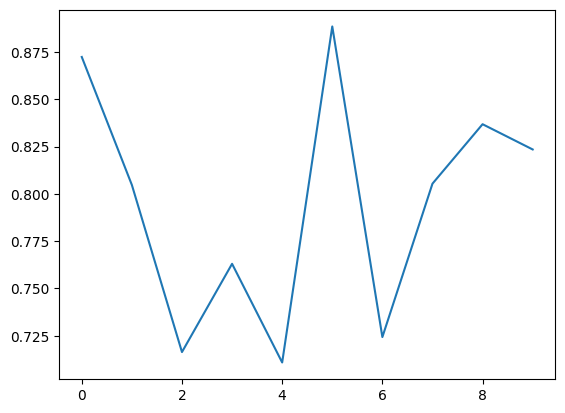

windowed_sentences_depth_score_v1_list: [0.         0.03381437 0.10127878 0.         0.11483544 0.
 0.13828856 0.01570719 0.         0.00667077]


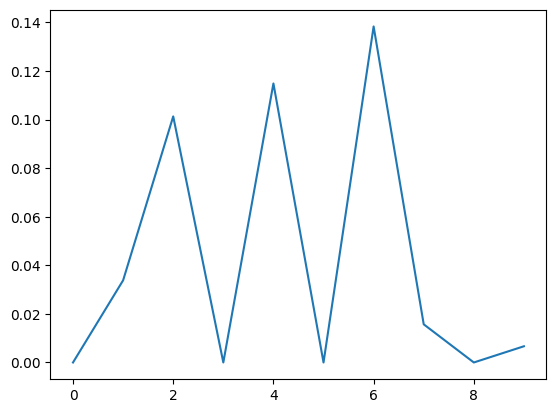

windowed_sentences_filtered_depth_score_v1_list: [0.         0.         0.10127878 0.         0.11483544 0.
 0.13828856 0.         0.         0.        ]


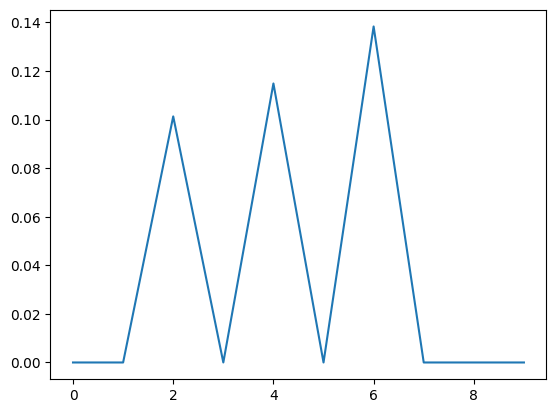

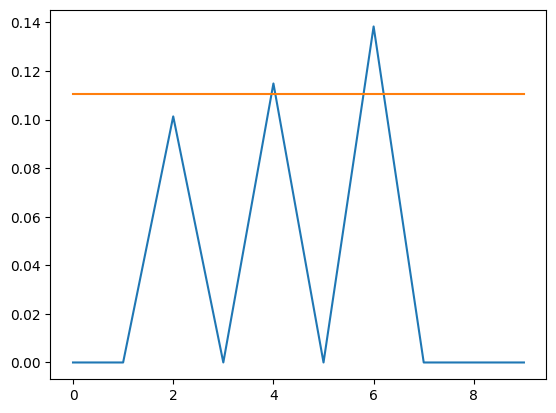


['We provide flights for employees to', 'return to', 'their home town every year']

Category: Home leave passage


TypeError: only length-1 arrays can be converted to Python scalars

In [91]:
sentences_demo = "We provide flights for employees to return to their home town every year"
categories_demo = ["Home leave passage", "Air passage benefit", "Air tickets to home country", "Flight to home country", "Cash payment in-lieu of home leave passage", "Passage provided for business purpose", "Overseas holiday trips", "Festive", "Special"]
combined_split_test(sentences_demo, categories_demo, graph_status=True, nested_emb=False)

In [ ]:
# make new function take is more variable, can adjust model, so can pass in embedding model function so a param and all the other stuff can put as variable!!
## can make function to produce/return function, then use this new produced function to split, and also to do classify
### use model function as param to make return function for split model and also use model as param to make function to compare and classify/categorise

#### can make it into 2 parter, cos split segment maybe one model is better
#### , and another is better for classification/categorise, maybe even zero shot classifier

# eg.
def split_text_func(emb_model_func):
    return some_function_that_uses_input_emb_model_func_to_split
def compare_function(emb_model_func):
    return some_function_that_uses_input_emb_model_func_to_compare

something like that!!